## Lista: 6a
Aluno: Arthur Mauricio

In [64]:
import numpy as np
import math
import sys
import matplotlib.pyplot as plt

In [65]:
def calc_erro_rel(serie):
    erros_aux = []
    for j in range(1, serie.size):
        erro = np.abs((serie[j-1] - serie[j])/serie[j-1])
        erros_aux.append(erro)
    return np.array(erros_aux)

In [66]:
def calc_erro_real(serie, val):
    erros_aux = []
    for j in range(serie.size):
        erros_aux.append(np.abs(1-(serie[j]/val)))
    return np.array(erros_aux)

### Questão 1

In [67]:
def bissecao(a,b,f, erro_tol = 1e-10, max_it = None):
    i,a_i,b_i = 0,a,b
    erro, x_ant, x = 1, a, a
    if (np.sign(f(a)) * np.sign(f(b))) != -1:
        raise Exception("Não existe raiz nesse intervalo")
    else:
        while erro > erro_tol:
            x = (a_i+b_i)/2
            sign_inf = np.sign(f(a_i))
            sign_sup = np.sign(f(x))
            if f(x)==0:
                return x
            else:
                if sign_inf * sign_sup == -1:
                    b_i = x
                else:
                    a_i = x
            i+=1
            print(f"Aproximação nº {i}: {x}")
            erro = np.abs((x - x_ant)/x)
            x_ant = x
            i = i+1
            if(max_it != None and i == max_it):
                print("Máximo de iterações atingido")
                return x
    return x





In [68]:
f_1 = lambda x : 2*x

In [69]:
bissecao(-100, 100, f_1)

0.0

### Questão 2

In [70]:
f = lambda x : -0.5*(math.pow(x, 2)) + 2.5 * x + 4.5

Forma gráfica

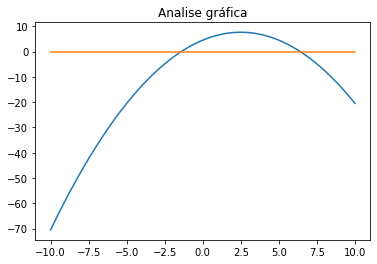

In [71]:
axis_x = np.linspace(-10, 10, 1000)
plt.title("Analise gráfica")
plt.plot(axis_x, [f(i) for i in axis_x])
plt.plot([-10,10],[0,0])
plt.show()

Podemos ver que as raizes estão entre: 0 e -2.5, e entre 5 e 7.5

Calculando com a fórmula quadrática (utilizando o método np.roots)

In [72]:
np.roots([-0.5,2.5,4.5])

array([ 6.40512484, -1.40512484])

Calculando com método da bisseção

In [73]:
bissecao(a = 5, b = 10, max_it=3, f =f)

Aproximação nº 1: 7.5
Aproximação nº 3: 6.25
Aproximação nº 5: 6.875
Aproximação nº 7: 6.5625
Aproximação nº 9: 6.40625
Aproximação nº 11: 6.328125
Aproximação nº 13: 6.3671875
Aproximação nº 15: 6.38671875
Aproximação nº 17: 6.396484375
Aproximação nº 19: 6.4013671875
Aproximação nº 21: 6.40380859375
Aproximação nº 23: 6.405029296875
Aproximação nº 25: 6.4056396484375
Aproximação nº 27: 6.40533447265625
Aproximação nº 29: 6.405181884765625
Aproximação nº 31: 6.4051055908203125
Aproximação nº 33: 6.405143737792969
Aproximação nº 35: 6.405124664306641
Aproximação nº 37: 6.405134201049805
Aproximação nº 39: 6.405129432678223
Aproximação nº 41: 6.405127048492432
Aproximação nº 43: 6.405125856399536
Aproximação nº 45: 6.405125260353088
Aproximação nº 47: 6.4051249623298645
Aproximação nº 49: 6.405124813318253
Aproximação nº 51: 6.4051248878240585
Aproximação nº 53: 6.4051248505711555
Aproximação nº 55: 6.405124831944704
Aproximação nº 57: 6.40512484125793
Aproximação nº 59: 6.4051248366013

6.405124838347547

Erro relativo das iterações

In [74]:
calc_erro_rel(np.array([7.5,6.25,6.875]))

array([0.16666667, 0.1       ])

Erro entre as iterações e os valores reais

In [75]:
calc_erro_real(np.array([7.5,6.25,6.875]),6.405125)

array([0.17093734, 0.02421889, 0.07335922])

### Questão 3

In [76]:
s = lambda x : np.sin(x)

### Questão 4

In [77]:
f = lambda x : 2*math.pow(x,6) - 1.5*math.pow(x,4)+10*x+20
d_v = lambda  x: -12*math.pow(x,5) -6*math.pow(x,3)+10

In [78]:
bissecao(a = 0, b = 1, f= d_v, erro_tol=0.05)

Aproximação nº 1: 0.5
Aproximação nº 3: 0.75
Aproximação nº 5: 0.875
Aproximação nº 7: 0.8125
Aproximação nº 9: 0.84375


0.84375

### Questão 5

In [79]:
def regula_falsi(x_i, x_u,f, n = 10):
    if (np.sign(f(x_i)) * np.sign(f(x_u))) != -1:
        raise Exception("Não existe raiz nesse intervalo")
    x = None

    for i in range(n):
        x = x_u - (f(x_u) * ((x_u-x_i)/(f(x_u)-f(x_i))))
        if f(x) == 0:
            print(f"{i} iterações.")
            return x
        else:
            if np.sign(f(x_i)) * np.sign(f(x_u)) == -1:
                x_i = x
            else:
                x_u = x
    return x

Testando com equação da questão 1

In [80]:
f = lambda x : -0.5*(math.pow(x, 2)) + 2.5 * x + 4.5
regula_falsi(x_i = 5, x_u = 10, f = f)

6.405108253964062

Com apenas 10 iterações conseguimos uma aproximação aceitavel da raiz